In [101]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
from scipy import signal as sp
from tqdm import tqdm
from scipy.fft import fft, fftfreq
import numpy
import os
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [170]:
wav_path = "wav2"
wav_list = os.listdir(wav_path)
print(wav_list)

['peeled_11.wav', 'unpeeled_3.wav', 'unpeeled_2.wav', 'peeled_10.wav', 'peeled_12.wav', 'unpeeled_0.wav', 'unpeeled_1.wav', 'peeled_13.wav', 'peeled_17.wav', 'unpeeled_5.wav', 'unpeeled_4.wav', 'peeled_16.wav', 'unpeeled_18.wav', 'peeled_14.wav', 'unpeeled_6.wav', 'unpeeled_7.wav', 'peeled_15.wav', 'unpeeled_19.wav', 'peeled_9.wav', 'peeled_8.wav', 'peeled_5.wav', 'peeled_4.wav', 'peeled_6.wav', 'peeled_7.wav', 'peeled_3.wav', 'peeled_2.wav', 'peeled_0.wav', 'peeled_1.wav', 'unpeeled_14.wav', 'peeled_18.wav', 'peeled_19.wav', 'unpeeled_15.wav', 'unpeeled_17.wav', 'unpeeled_9.wav', 'unpeeled_8.wav', 'unpeeled_16.wav', 'unpeeled_12.wav', 'unpeeled_13.wav', 'unpeeled_11.wav', 'unpeeled_10.wav']


In [128]:
# wav_list = ['peeled_1.wav']

In [171]:
num_data = len(wav_list)

SIGNAL_LENGTH = 255000
SAMPLE_RATE = 44100

signal_list = np.zeros((num_data, SIGNAL_LENGTH))
peeled_signal_list = np.zeros((int(num_data/2), SIGNAL_LENGTH))
unpeeled_signal_list = np.zeros((int(num_data/2), SIGNAL_LENGTH))
normalized_signal = np.zeros((num_data, SIGNAL_LENGTH))

label = np.zeros(num_data)

count_peeled = 0
count_unpeeled = 0
for i, wav in enumerate(tqdm(wav_list)):
    wav_full_path = os.path.join(wav_path, wav)
    spf = wave.open(wav_full_path, "r")
    # Extract Raw Audio from Wav File
    signal = spf.readframes(-1)
    signal = np.fromstring(signal, "int16")
    signal = signal[20000: SIGNAL_LENGTH+20000]
    # print(len(signal))
    # signal = signal.resize((signal.shape[0], SIGNAL_LENGTH))
    # signal = np.medfilt(signal, 99)
    signal_list[i, :] = signal
    normalized_signal[i, :] = np.int16((signal/ signal.max())*32767)
    
    _label = 0 if wav.split('_')[0]=='unpeeled' else 1
    if wav.split('_')[0]=='unpeeled':
        unpeeled_signal_list[count_unpeeled, :] = np.int16((signal/ signal.max())*32767)
        count_unpeeled += 1
    else:
        peeled_signal_list[count_peeled, :] = np.int16((signal/ signal.max())*32767)
        count_peeled += 1
    #print(_label)
    label[i] = _label

  0%|          | 0/40 [00:00<?, ?it/s]/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/2082260748.py:20: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal = np.fromstring(signal, "int16")
100%|██████████| 40/40 [00:00<00:00, 426.60it/s]


In [136]:
def visualize(signal_list=None) -> None:
    # signal_list is a list of signals(np array)
    # If not specify the signals in the input arguments, will use self. signal_list by default
    for signal in signal_list:
        plt.figure(1)
        plt.title("Signal Wave...")
        plt.plot(signal)
        plt.show()

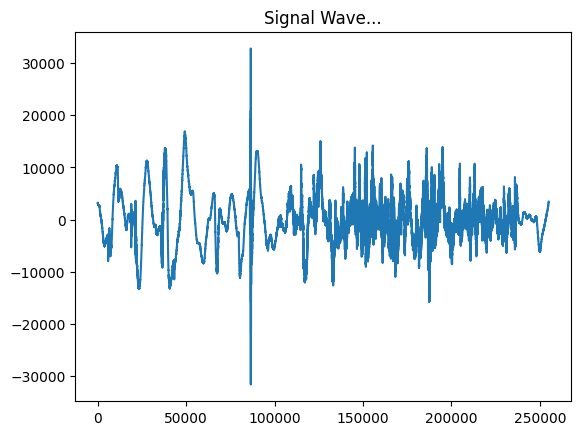

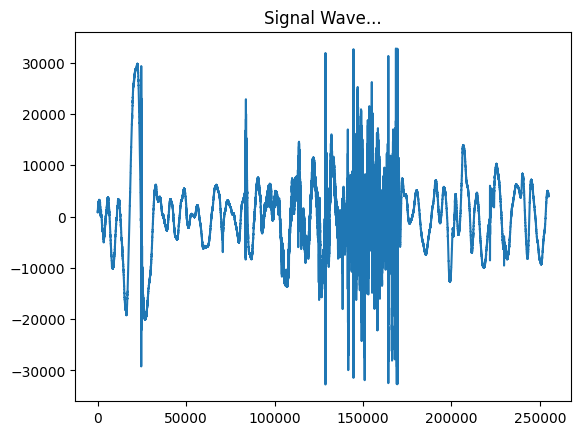

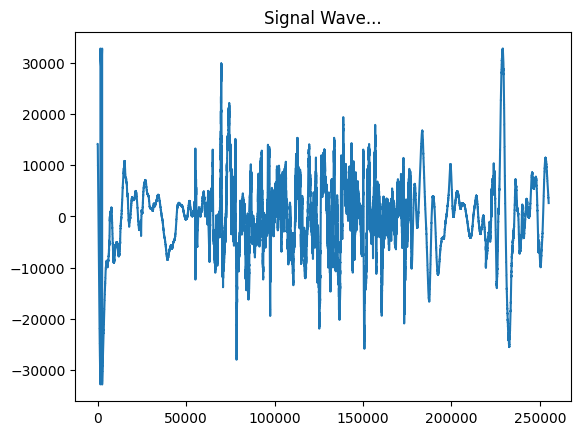

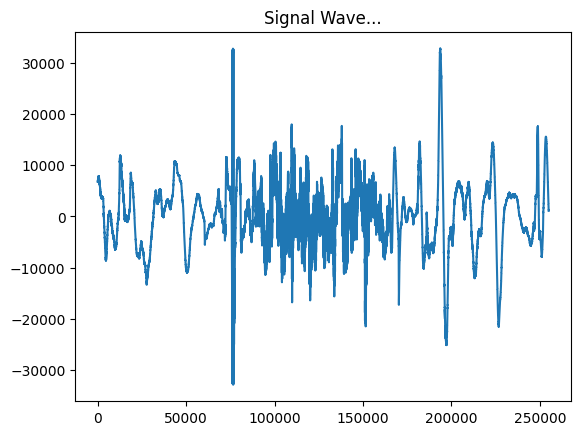

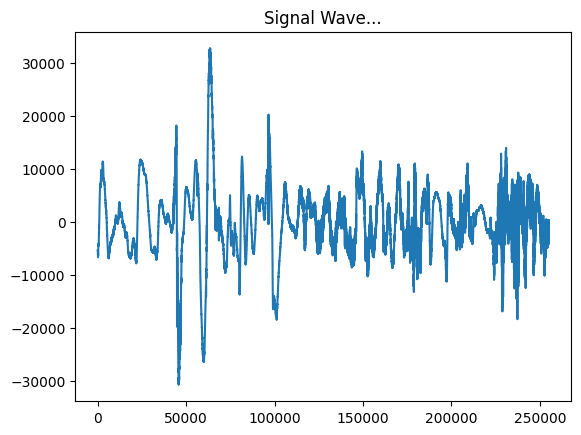

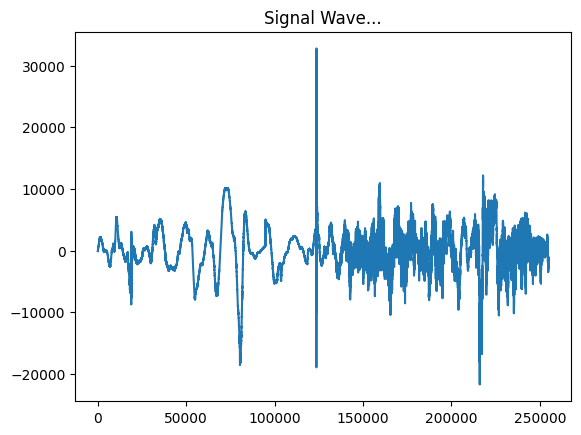

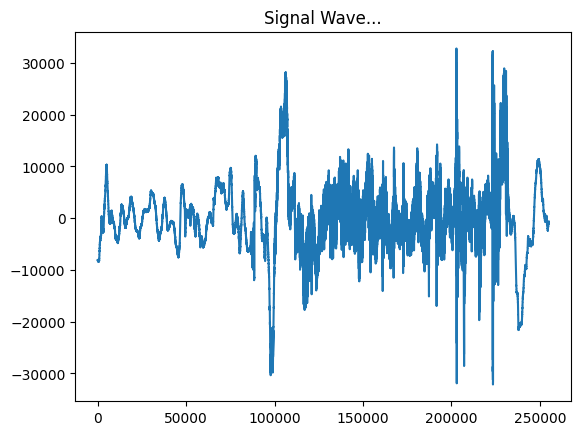

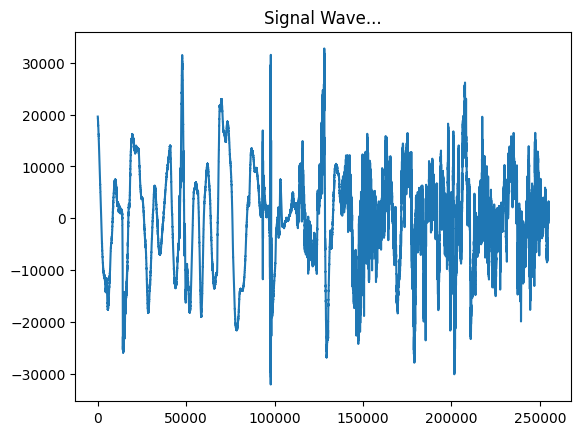

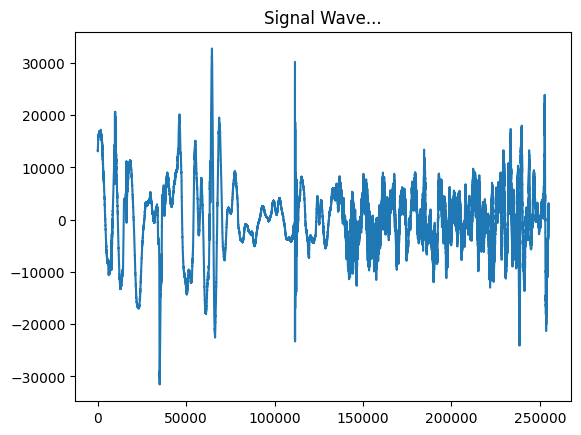

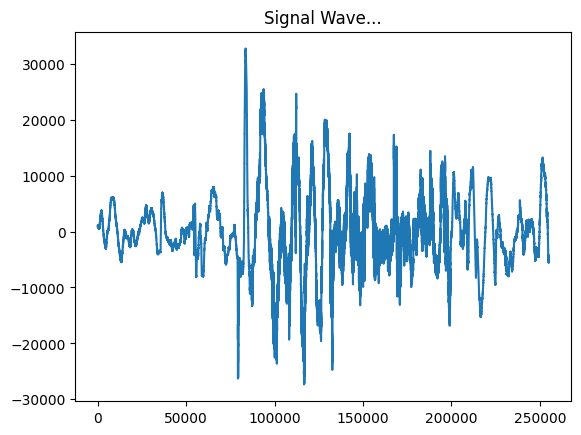

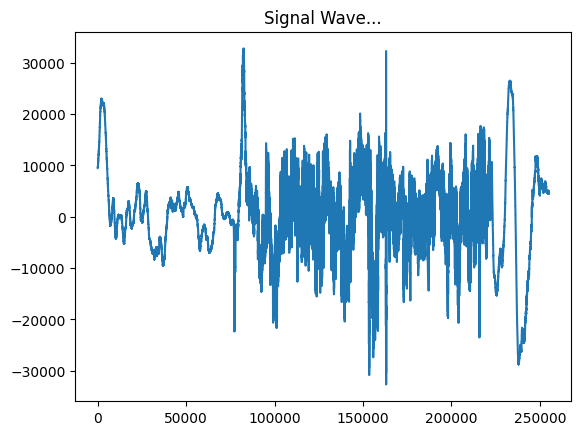

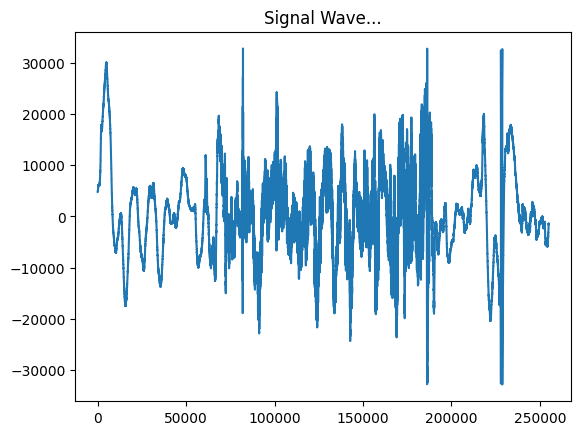

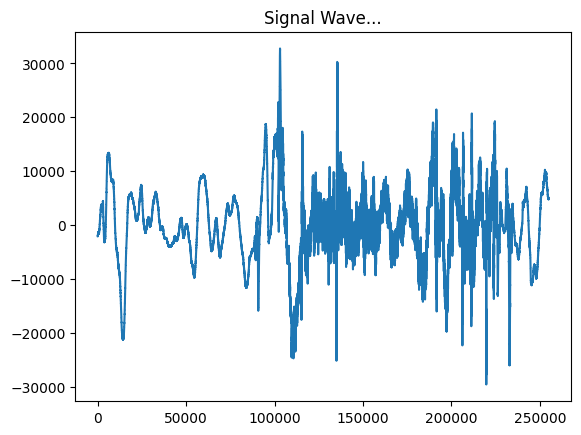

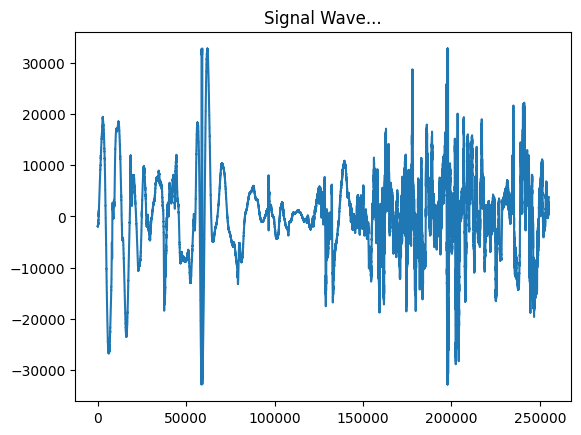

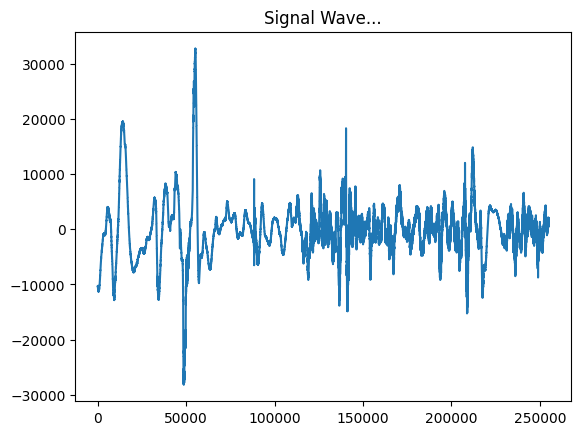

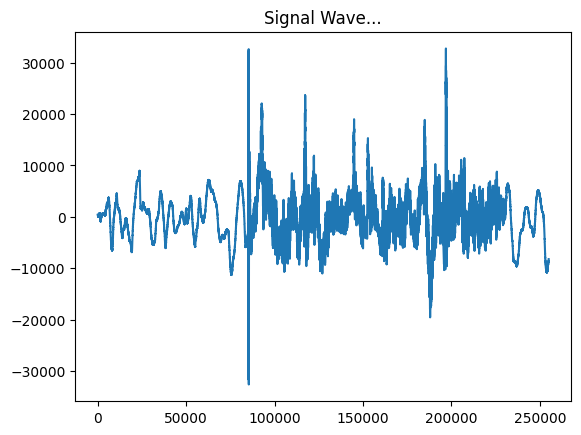

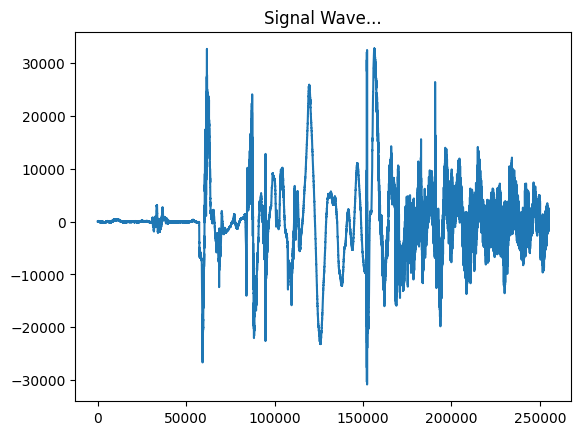

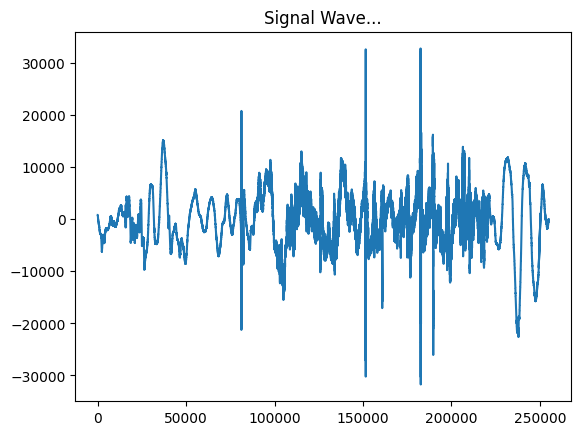

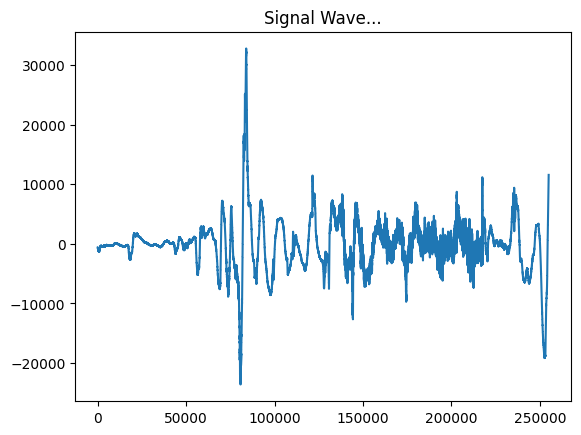

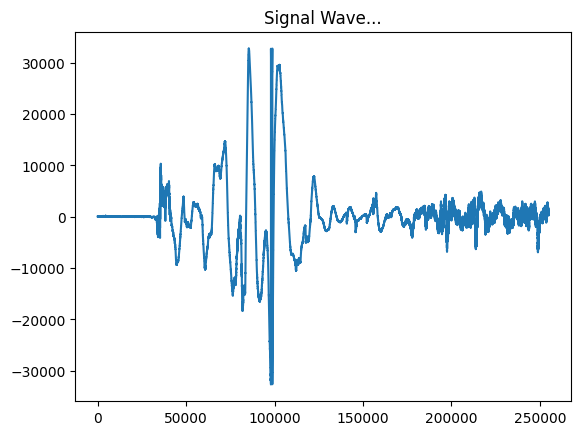

In [142]:
visualize(unpeeled_signal_list)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(normalized_signal, label, test_size=0.4, random_state=3)

In [30]:
print('fitting...')
clf = SVC(C=600, gamma=100)
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print("acc=%0.3f" % acc)

fitting...
acc=0.375


In [116]:
def smooth(x,window_len=1,window='bartlett'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y

In [173]:
new_siglist = np.zeros((len(signal_list), SIGNAL_LENGTH))
for i, sig in enumerate(signal_list):
    new_siglist[i, :] = smooth(sig)

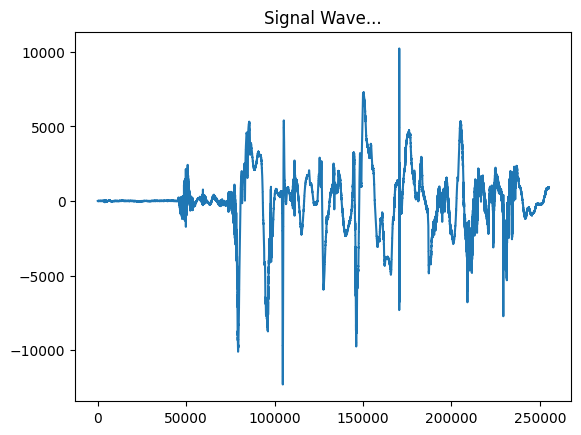

In [133]:
visualize(new_siglist)

In [180]:
X_train, X_test, y_train, y_test = train_test_split(new_siglist, label, test_size=0.4, random_state=3)

print('fitting...')
clf = SVC(C=1)
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print("acc=%0.3f" % acc)

fitting...
acc=0.375


In [181]:
def extract_frequency(signal):
    # print(0)
    sp = np.fft.fft(signal, SIGNAL_LENGTH, 0)[0:500]
    freq = np.fft.fftfreq(signal.shape[-1])[0:500]
    # print(1)
    return sp, freq

sp_list = []

for sig in peeled_signal_list:
    sp, freq = extract_frequency(sig)
    sp_list.append(sp.real)
    # plt.figure(1)
    # plt.plot(freq[0:2000], sp.real[0:2000])
    # plt.show()
    # print(2)

sp_list = np.array(sp_list)
# visualize(sp_list)

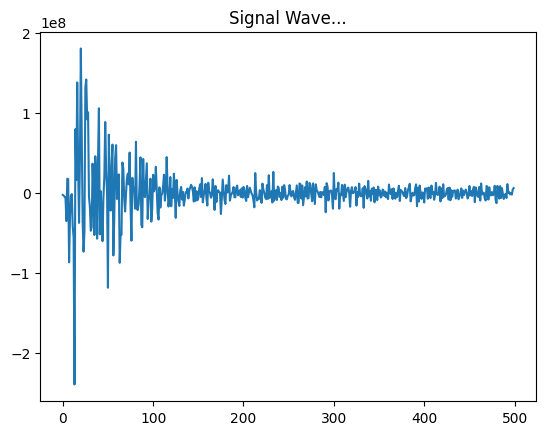

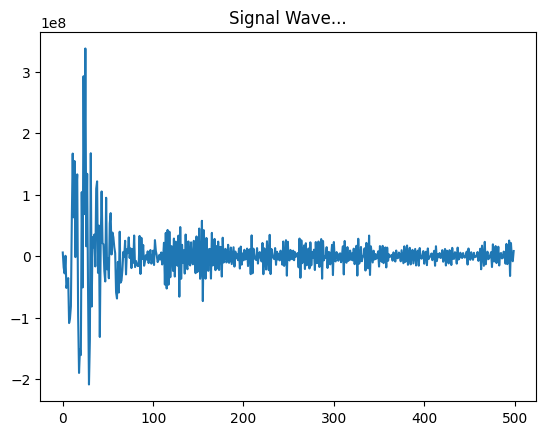

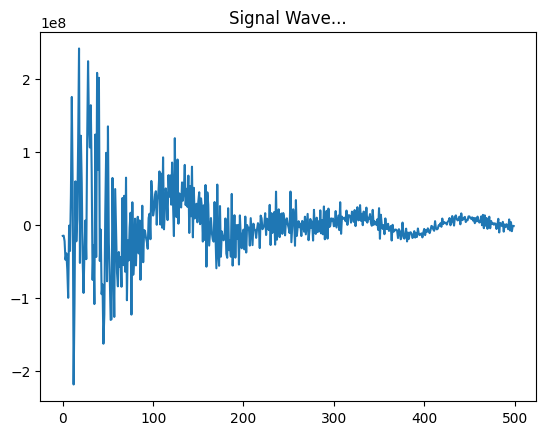

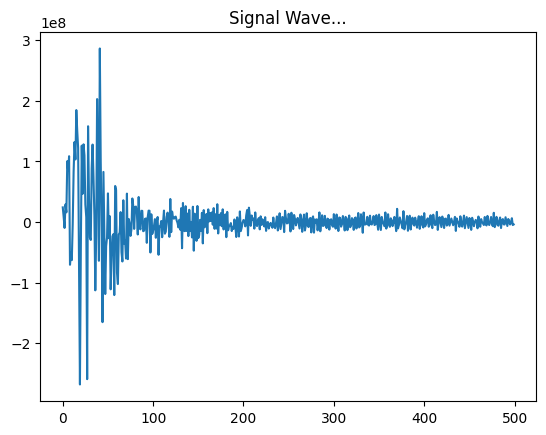

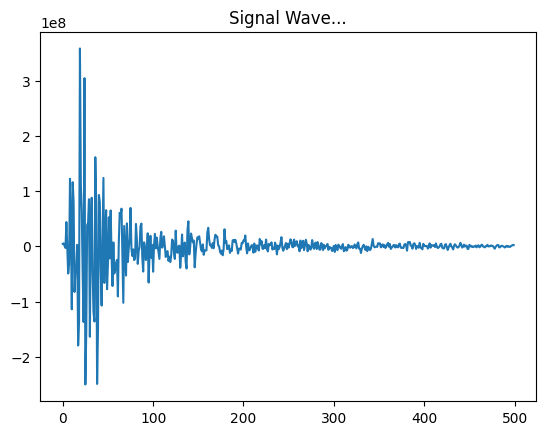

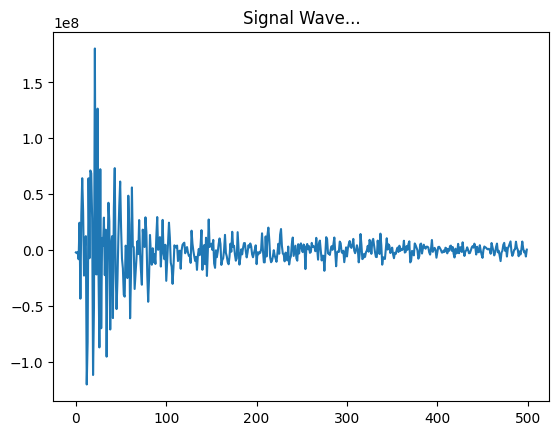

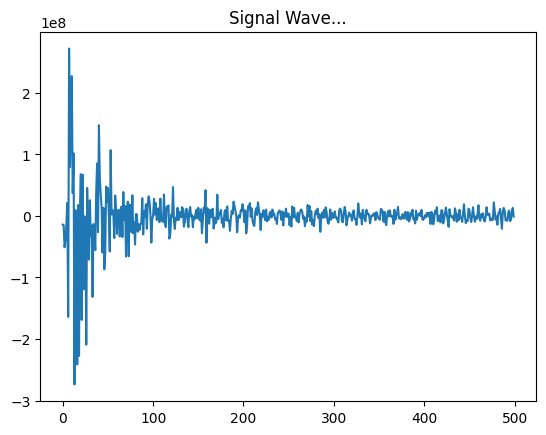

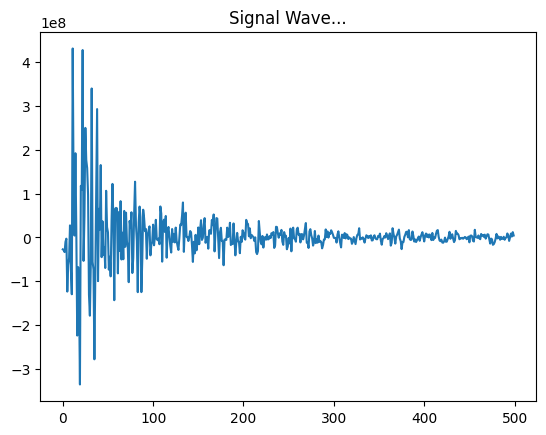

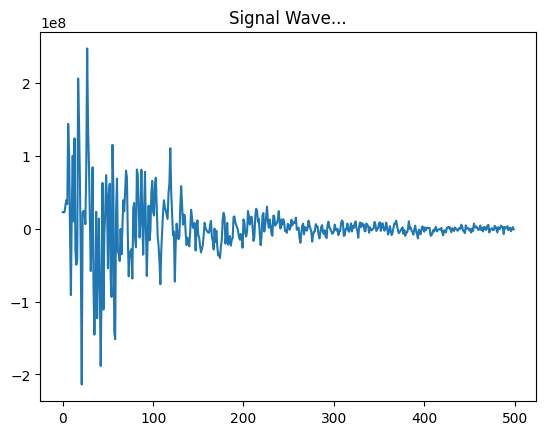

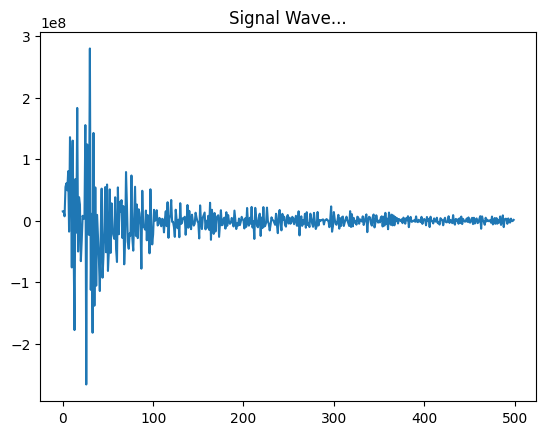

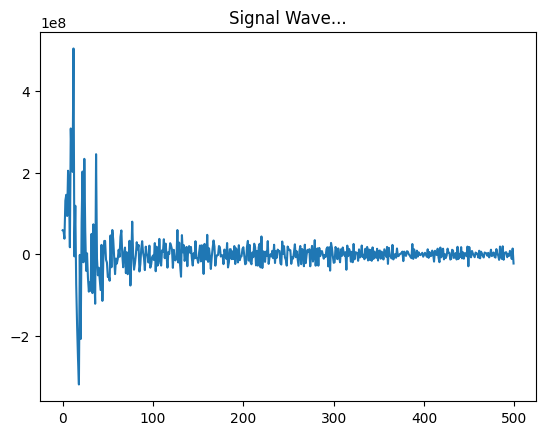

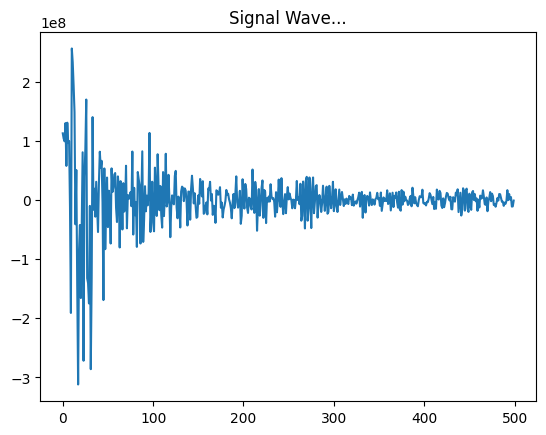

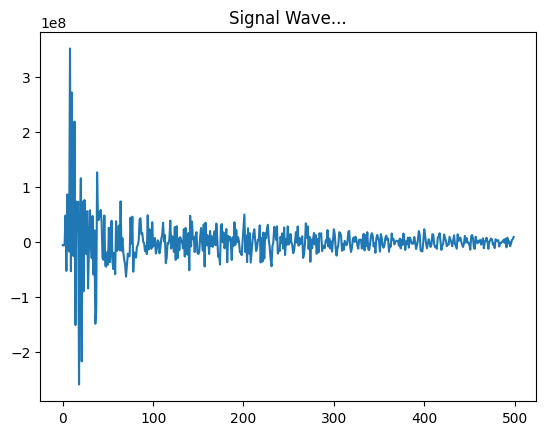

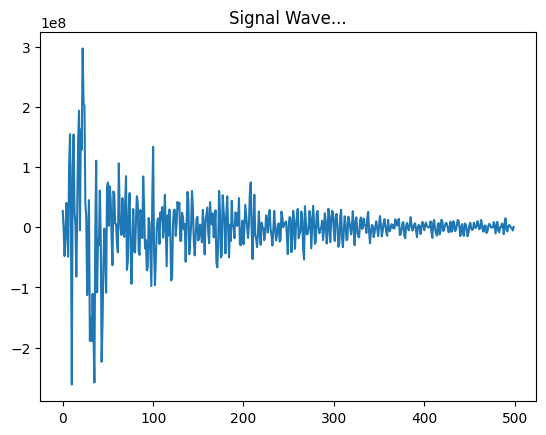

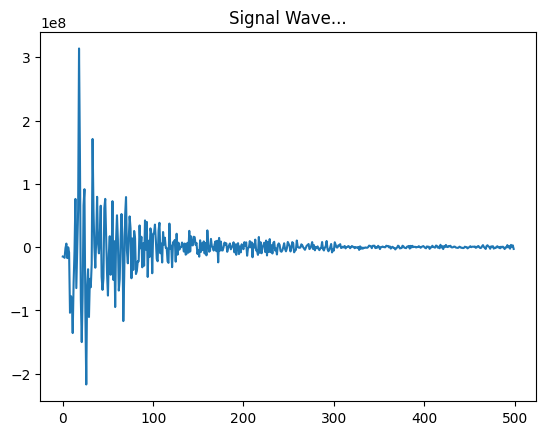

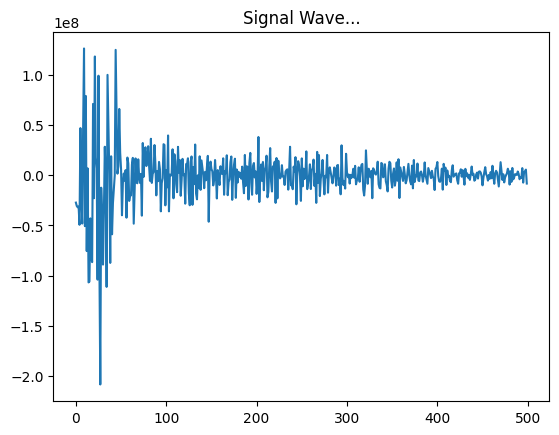

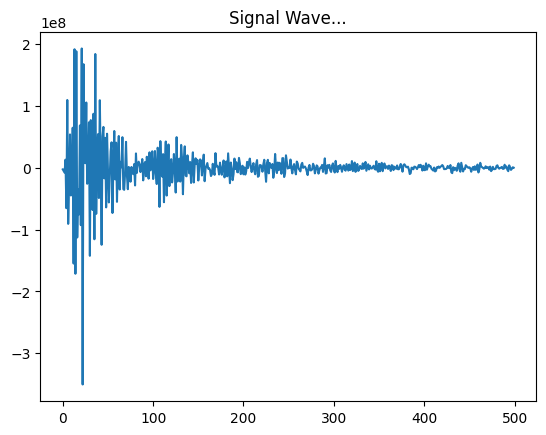

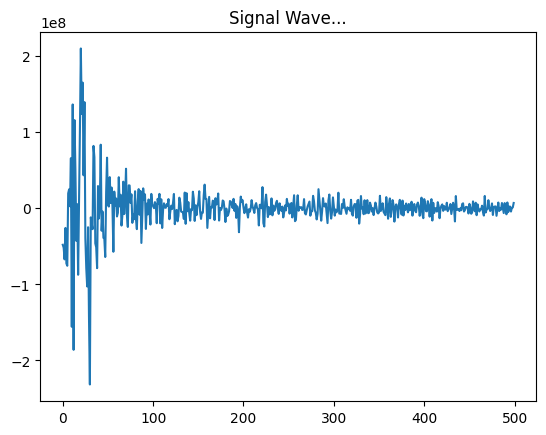

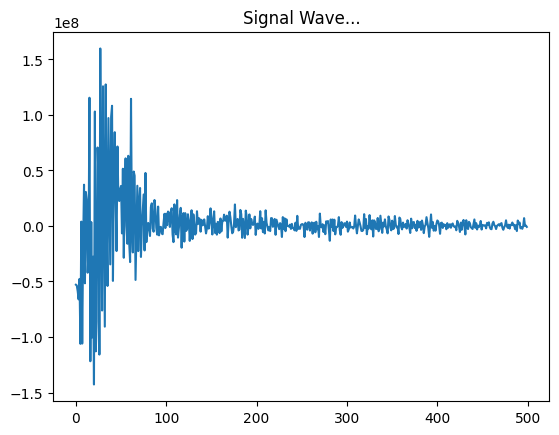

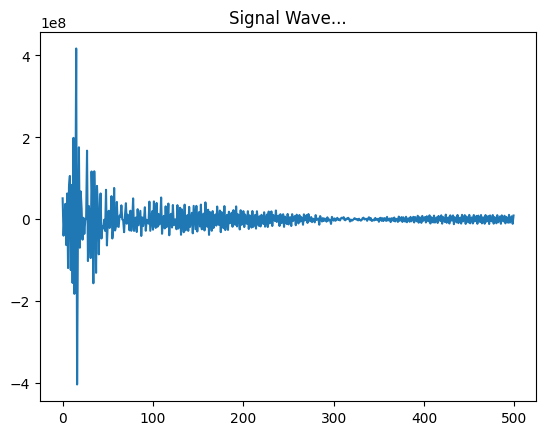

In [145]:
sp_list = []
for sig in unpeeled_signal_list:
    sp, freq = extract_frequency(sig)
    sp_list.append(sp.real)
    # plt.figure(1)
    # plt.plot(freq[0:2000], sp.real[0:2000])
    # plt.show()
    # print(2)

sp_list = np.array(sp_list)
visualize(sp_list)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(sp_list, label, test_size=0.2, random_state=10)

print('fitting...')
clf = SVC(kernel = 'sigmoid', C=1, gamma='auto')
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print("acc=%0.3f" % acc)


# import optunity
# import optunity.metrics

# # score function: twice iterated 10-fold cross-validated accuracy
# @optunity.cross_validated(x=X_train, y=y_train, num_folds=10, num_iter=200)
# def svm_acc(x_train, y_train, x_test, y_test, logC, logGamma):
#     model = SVC(C=10 ** logC, gamma=10 ** logGamma).fit(x_train, y_train)
#     decision_values = model.decision_function(x_test)
#     return optunity.metrics.accuracy(y_test, decision_values)

# # perform tuning
# hps, _, _ = optunity.maximize(svm_acc, num_evals=200, logC=[-50, 5], logGamma=[-5, 1])
# print(hps)
# # train model on the full training set with tuned hyperparameters
# optimal_model = SVC(C=10 ** hps['logC'], gamma=10 ** hps['logGamma']).fit(X_train, y_train)
# print('fitting...')
# optimal_model.fit(X_train, y_train)
# acc = optimal_model.score(X_test, y_test)
# print("acc=%0.3f" % acc)

fitting...
acc=0.625


In [98]:
print(clf.predict_proba(X_train))

AttributeError: predict_proba is not available when  probability=False

In [61]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
gpc =  GaussianProcessClassifier(1 * RBF(1.0))
gpc.fit(X_train, y_train)
acc = gpc.score(X_test, y_test)
print(gpc.predict_proba(X_train))
print("acc=%0.3f" % acc)

[[0.49961152 0.50038848]
 [0.50038849 0.49961151]
 [0.50038849 0.49961151]
 [0.50038849 0.49961151]
 [0.50038849 0.49961151]
 [0.49961152 0.50038848]
 [0.50038849 0.49961151]
 [0.50038849 0.49961151]
 [0.50038849 0.49961151]
 [0.49961152 0.50038848]
 [0.50038849 0.49961151]
 [0.49961152 0.50038848]
 [0.50038849 0.49961151]
 [0.49961152 0.50038848]
 [0.49961152 0.50038848]
 [0.49961152 0.50038848]
 [0.49961152 0.50038848]
 [0.50038849 0.49961151]
 [0.49961152 0.50038848]
 [0.49961152 0.50038848]]
acc=0.500


In [68]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=(50000, 10), max_iter=10000, random_state=1)
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print("acc=%0.3f" % acc)

acc=0.500


/Users/cathy/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [151]:
import librosa
import numpy as np
import pickle
from pathlib import Path
import os


class AudioFeature:
    def __init__(self, src_path, fold, label):
        self.src_path = src_path
        self.fold = fold
        self.label = label
        self.y, self.sr = librosa.load(self.src_path, mono=True)
        self.features = None

    def _concat_features(self, feature):
        """
        Whenever a self._extract_xxx() method is called in this class,
        this function concatenates to the self.features feature vector
        """
        self.features = np.hstack(
            [self.features, feature] if self.features is not None else feature
        )

    def _extract_mfcc(self, n_mfcc=25):
        mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)

        mfcc_mean = mfcc.mean(axis=1).T
        mfcc_std = mfcc.std(axis=1).T
        mfcc_feature = np.hstack([mfcc_mean, mfcc_std])
        self._concat_features(mfcc_feature)

    def _extract_spectral_contrast(self, n_bands=3):
        spec_con = librosa.feature.spectral_contrast(
            y=self.y, sr=self.sr, n_bands=n_bands
        )

        spec_con_mean = spec_con.mean(axis=1).T
        spec_con_std = spec_con.std(axis=1).T
        spec_con_feature = np.hstack([spec_con_mean, spec_con_std])
        self._concat_features(spec_con_feature)

    def _extract_chroma_stft(self):
        stft = np.abs(librosa.stft(self.y))
        chroma_stft = librosa.feature.chroma_stft(S=stft, sr=self.sr)
        chroma_mean = chroma_stft.mean(axis=1).T
        chroma_std = chroma_stft.std(axis=1).T
        chroma_feature = np.hstack([chroma_mean, chroma_std])
        self._concat_features(chroma_feature)

    def extract_features(self, *feature_list, save_local=True):
        """
        Specify a list of features to extract, and a feature vector will be
        built for you for a given Audio sample.
        By default the extracted feature and class attributes will be saved in
        a local directory. This can be turned off with save_local=False.
        """
        extract_fn = dict(
            mfcc=self._extract_mfcc,
            spectral=self._extract_spectral_contrast,
            chroma=self._extract_chroma_stft,
        )

        for feature in feature_list:
            extract_fn[feature]()

        if save_local:
            self._save_local()

    def _save_local(self, clean_source=True):
        out_name = self.src_path.split("/")[-1]
        out_name = out_name.replace(".wav", "")

        filename = f"features/fold{self.fold}_{out_name}.pkl"
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        with open(filename, "wb") as f:
            pickle.dump(self, f)

        if clean_source:
            self.y = None

In [195]:
wav_path = "wav2"
wav_list = os.listdir(wav_path)
print(wav_list)

audio_features = []
for i, wav in enumerate(tqdm(wav_list)):
    wav_full_path = os.path.join(wav_path, wav)
    _label = 0 if wav.split('_')[0]=='unpeeled' else 1
    audio = AudioFeature(wav_full_path, 3, _label)
    audio.extract_features("mfcc", "spectral", "chroma")
    # audio.extract_features("chroma")
    audio_features.append(audio)
feature_matrix = np.vstack([audio.features for audio in audio_features])
labels = np.array([audio.label for audio in audio_features])
folds = np.array([audio.fold for audio in audio_features])
    

['peeled_11.wav', 'unpeeled_3.wav', 'unpeeled_2.wav', 'peeled_10.wav', 'peeled_12.wav', 'unpeeled_0.wav', 'unpeeled_1.wav', 'peeled_13.wav', 'peeled_17.wav', 'unpeeled_5.wav', 'unpeeled_4.wav', 'peeled_16.wav', 'unpeeled_18.wav', 'peeled_14.wav', 'unpeeled_6.wav', 'unpeeled_7.wav', 'peeled_15.wav', 'unpeeled_19.wav', 'peeled_9.wav', 'peeled_8.wav', 'peeled_5.wav', 'peeled_4.wav', 'peeled_6.wav', 'peeled_7.wav', 'peeled_3.wav', 'peeled_2.wav', 'peeled_0.wav', 'peeled_1.wav', 'unpeeled_14.wav', 'peeled_18.wav', 'peeled_19.wav', 'unpeeled_15.wav', 'unpeeled_17.wav', 'unpeeled_9.wav', 'unpeeled_8.wav', 'unpeeled_16.wav', 'unpeeled_12.wav', 'unpeeled_13.wav', 'unpeeled_11.wav', 'unpeeled_10.wav']


  0%|          | 0/40 [00:00<?, ?it/s]/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[0.01106804 0.01591776 0.01365853 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
  2%|▎         | 1/40 [00:00<00:03,  9.82it/s]

i


/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[-0.02035186 -0.03059923 -0.02699419 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
  5%|▌         | 2/40 [00:00<00:04,  7.81it/s]

i


/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[-0.00397482 -0.00412855 -0.00204953 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
  8%|▊         | 3/40 [00:00<00:04,  7.45it/s]

i


/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[-0.04054267 -0.06007599 -0.05283076 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 10%|█         | 4/40 [00:00<00:04,  7.51it/s]

i


/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[-0.05060673 -0.0752877  -0.06602622 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 12%|█▎        | 5/40 [00:00<00:04,  7.76it/s]

i


/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[-0.17840764 -0.26394042 -0.22926442 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 15%|█▌        | 6/40 [00:00<00:05,  6.72it/s]

i


/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[0.01680985 0.02342392 0.01810292 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 18%|█▊        | 7/40 [00:00<00:05,  6.52it/s]

i


/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[0.00589924 0.00887729 0.00778939 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 20%|██        | 8/40 [00:01<00:04,  6.47it/s]

i


/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[0.03060172 0.04582568 0.04047444 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 22%|██▎       | 9/40 [00:01<00:04,  7.10it/s]

i


/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[0.02206001 0.03267707 0.02828399 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 25%|██▌       | 10/40 [00:01<00:04,  7.03it/s]

i


/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[-0.06106062 -0.09132969 -0.07973746 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 28%|██▊       | 11/40 [00:01<00:04,  6.14it/s]/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[0.1932236  0.28777775 0.25154668 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 30%|███       | 12/40 [00:01<00:04,  6.61it/s]

i
i


/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[0.00809073 0.0110406  0.00927152 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 32%|███▎      | 13/40 [00:01<00:04,  6.63it/s]/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[0.01427378 0.02100275 0.01761145 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 35%|███▌      | 14/40 [00:02<00:03,  7.04it/s]

i
i


/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[0.00204218 0.00296491 0.00262016 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 38%|███▊      | 15/40 [00:02<00:03,  6.73it/s]/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[-0.08786348 -0.13125274 -0.11532793 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 40%|████      | 16/40 [00:02<00:03,  6.48it/s]

i
i


/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[0.03383576 0.05057283 0.04409429 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 42%|████▎     | 17/40 [00:02<00:03,  6.37it/s]/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[0.01339953 0.01858046 0.01516728 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 45%|████▌     | 18/40 [00:02<00:03,  6.57it/s]

i
i


/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[0.00276938 0.00424544 0.0038673  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 48%|████▊     | 19/40 [00:02<00:03,  5.83it/s]/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[ 2.7572305e-04 -2.1934129e-05 -5.5832348e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 50%|█████     | 20/40 [00:03<00:03,  5.87it/s]

i
i


/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[-0.00131998 -0.00187509 -0.001638   ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 52%|█████▎    | 21/40 [00:03<00:03,  4.92it/s]

i


/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[-0.00054253 -0.00075134 -0.00057922 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 55%|█████▌    | 22/40 [00:03<00:04,  3.90it/s]

i


/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[0.00082451 0.00129249 0.00124784 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 57%|█████▊    | 23/40 [00:04<00:05,  3.35it/s]

i


/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[-0.0012134  -0.00176197 -0.00168936 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 60%|██████    | 24/40 [00:04<00:04,  3.21it/s]/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[-0.04080367 -0.06095259 -0.05333464 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 62%|██████▎   | 25/40 [00:04<00:04,  3.60it/s]

i
i


/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[-0.04132346 -0.06105975 -0.05303536 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 65%|██████▌   | 26/40 [00:04<00:03,  3.83it/s]

i


/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[0.01530557 0.02261727 0.01972988 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 68%|██████▊   | 27/40 [00:05<00:03,  3.86it/s]

i


/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[ 6.443456e-05  6.969804e-05 -2.999526e-05 ...  0.000000e+00  0.000000e+00
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 70%|███████   | 28/40 [00:05<00:03,  3.61it/s]/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[-0.03878148 -0.05748905 -0.05112955 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 72%|███████▎  | 29/40 [00:05<00:02,  3.96it/s]

i
i


/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[0.04164154 0.06217346 0.05477734 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 75%|███████▌  | 30/40 [00:05<00:02,  4.39it/s]/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[-0.00615016 -0.00921323 -0.00826408 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 78%|███████▊  | 31/40 [00:05<00:01,  4.90it/s]

i
i


/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[0.24292047 0.36126047 0.31638122 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 80%|████████  | 32/40 [00:06<00:01,  5.29it/s]/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[0.17858155 0.26385316 0.22739749 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 82%|████████▎ | 33/40 [00:06<00:01,  5.71it/s]

i
i


/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[-0.137497   -0.2044302  -0.17846282 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 85%|████████▌ | 34/40 [00:06<00:01,  5.39it/s]/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[0.00889271 0.01350794 0.01174208 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 88%|████████▊ | 35/40 [00:06<00:00,  5.44it/s]

i
i


/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[-0.01098152 -0.01629315 -0.01387862 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 90%|█████████ | 36/40 [00:06<00:00,  5.84it/s]/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[0.01641488 0.02464674 0.02115322 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 92%|█████████▎| 37/40 [00:06<00:00,  5.82it/s]

i
i


/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[0.09998737 0.14869969 0.13033597 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 95%|█████████▌| 38/40 [00:07<00:00,  6.01it/s]/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[-0.00980353 -0.01514003 -0.01318837 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
 98%|█████████▊| 39/40 [00:07<00:00,  6.41it/s]

i
i


/var/folders/2z/346pf_1n4lq7qq23h4pvhbw00000gn/T/ipykernel_54838/3515250681.py:26: FutureWarning: Pass y=[1.9346792e-04 2.3087089e-04 6.7730500e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(self.y, sr=self.sr, n_mfcc=n_mfcc)
100%|██████████| 40/40 [00:07<00:00,  5.39it/s]

i


In [196]:
from sklearn.model_selection import LeaveOneGroupOut, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import random
from sklearn.model_selection import cross_val_score


class Model:
    def __init__(self, feature_matrix, labels, folds, cfg):

        self.X = feature_matrix
        self.encoder = LabelEncoder()
        self.y = self.encoder.fit_transform(labels)
        self.folds = folds
        self.cfg = cfg

        self.val_fold_scores_ = []

    def train_kfold(self):

        logo = LeaveOneGroupOut()
        groups = np.random.binomial(1,0.5,size=len(X))
        
        cross_val_score(clf, X, y, cv=logo,groups=groups)
        # for train_index, test_index in logo.split(self.X, self.y, self.folds):
        #     X_train, X_test = self.X[train_index], self.X[test_index]
        #     y_train, y_test = self.y[train_index], self.y[test_index]

        #     ss = StandardScaler(copy=True)
        #     X_train = ss.fit_transform(X_train)
        #     X_test = ss.transform(X_test)

        #     clf = self.cfg["model"]
        #     clf.fit(X_train, y_train)

        #     y_pred = clf.predict(X_test)

        #     fold_acc = cross_val_score(y_test, y_pred)
        #     self.val_fold_scores_.append(fold_acc)

        return self.val_fold_scores_

In [208]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import cross_val_score
from sklearn import svm    
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import Normalizer

#load the data


X = feature_matrix
y = labels
groups = np.random.binomial(1,0.5,size=len(X))

clf = svm.SVC(kernel='linear', C=1)    
cv = LeaveOneGroupOut()


c = cross_val_score(clf, X, y, cv=3,groups=groups)
print(c)

[0.85714286 0.76923077 0.84615385]


In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
print('fitting...')
clf = svm.SVC(kernel='linear', C=1)    
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print("acc=%0.3f" % acc)

fitting...
acc=0.938
